1. import data
2. descriptive statistics
3. missing values anaalysis and tratment
4. outlier analysis and treatment
5. EDA
6. correlation


In [34]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
print(df.describe(include="all"))


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Insights
# Glucose (Fasting):

Normal: 70 – 99 mg/dL

Prediabetes: 100 – 125 mg/dL

Diabetes: ≥ 126 mg/dL

# Blood Pressure (Diastolic):

Normal: 60 – 80 mm Hg

Low: < 60 mm Hg

High: > 80 mm Hg

#Skin Thickness:

Normal range: 10 – 50 mm

Insulin (2-Hour Post-Meal):

Normal range: 16 – 166 µU/mL

# Body Mass Index (BMI):

Normal: 18.5 – 24.9 kg/m²

Underweight: < 18.5

Overweight: 25 – 29.9

Obese: ≥ 30

In [ ]:
num_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()
for col in num_cols:
    if col!=0:
        df[col]=df[col].replace(0,df[cols].median())
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   636.000000  636.000000     636.000000     636.000000  636.000000   
mean      4.201258  118.869497      72.007862      27.001572   89.064465   
std       2.915135   28.996773      11.301102       8.771374   68.326674   
min       1.000000   44.000000      38.000000       7.000000   15.000000   
25%       2.000000   99.000000      64.000000      23.000000   42.500000   
50%       3.000000  114.000000      72.000000      23.000000   42.750000   
75%       6.000000  136.250000      80.000000      32.000000  122.000000   
max      13.000000  198.000000     106.000000      60.000000  330.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  636.000000                636.000000  636.000000  636.000000  
mean    31.964151                  0.426237   32.555031    0.309748  
std      6.384132                  0.245088   10.879807    0.462754  
min     18.200000                  

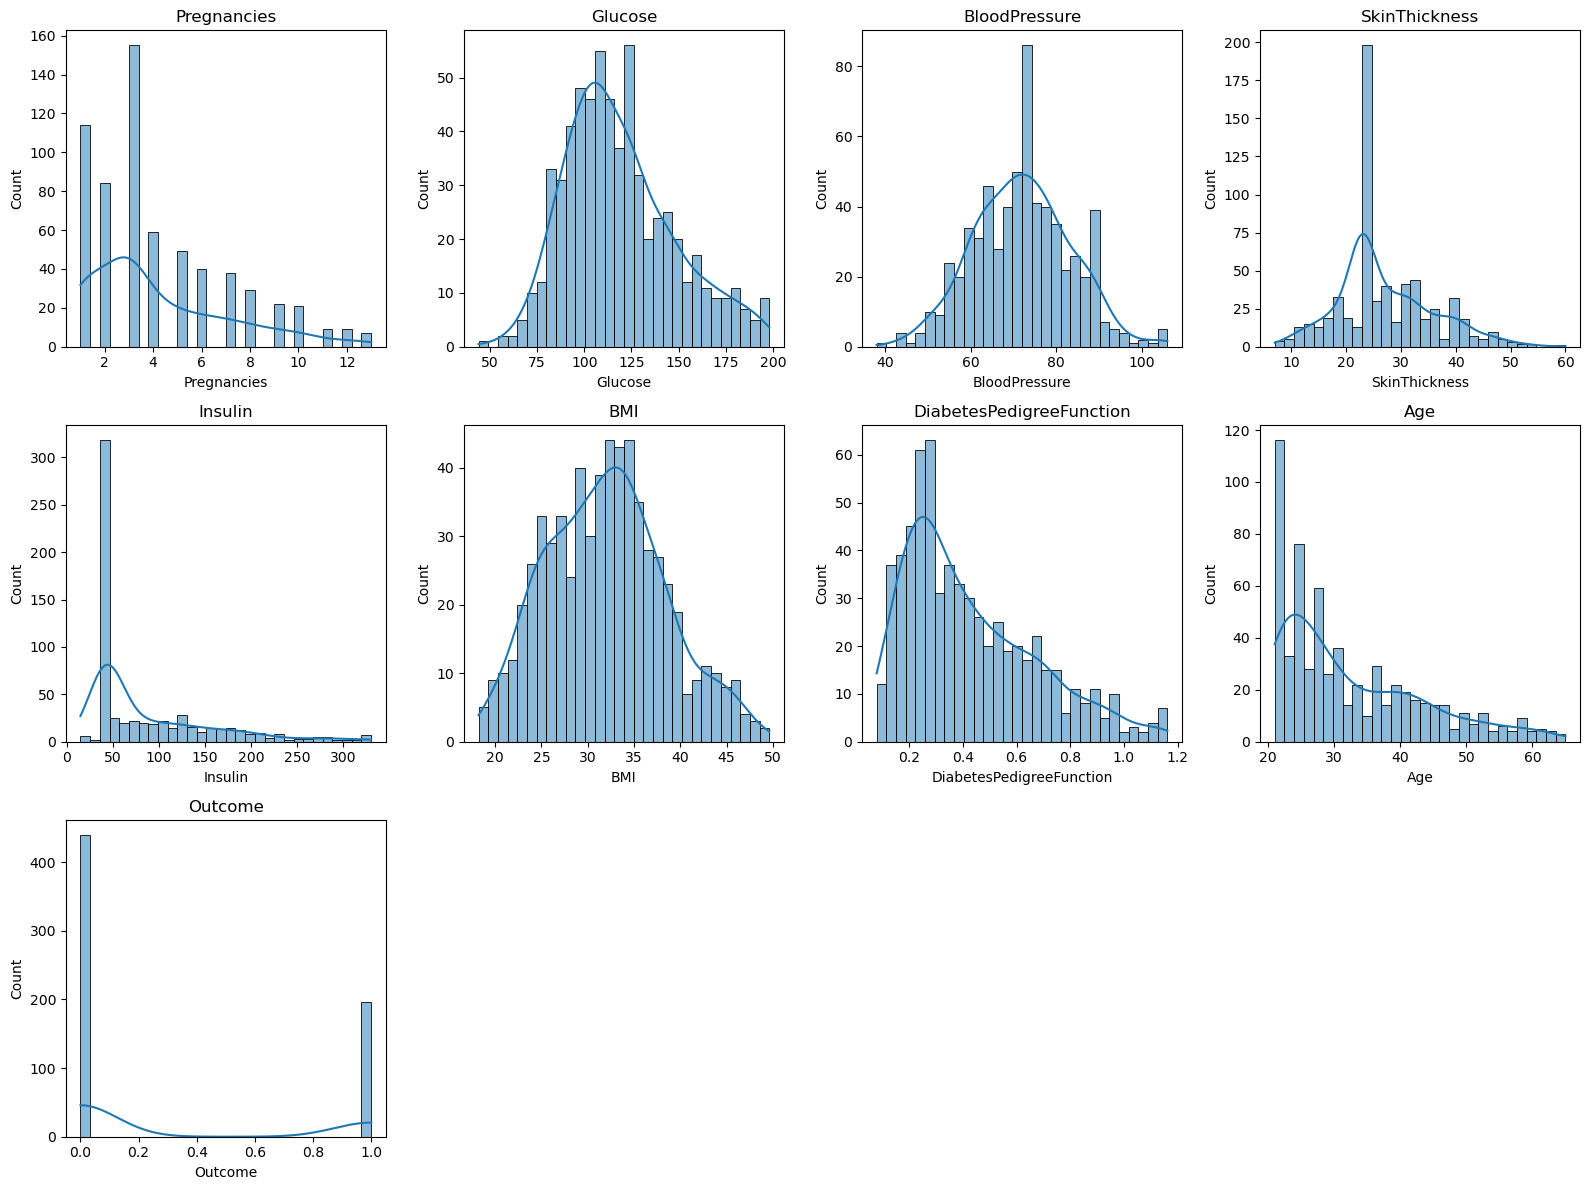

In [72]:
import math
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30,kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='Glucose'>

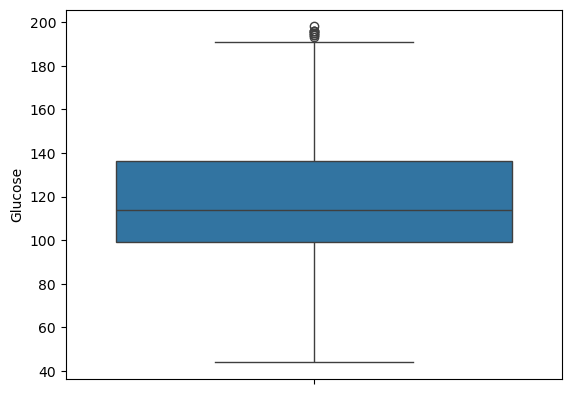

In [73]:
sns.boxplot(df['Glucose'])

In [69]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: ylabel='Glucose'>

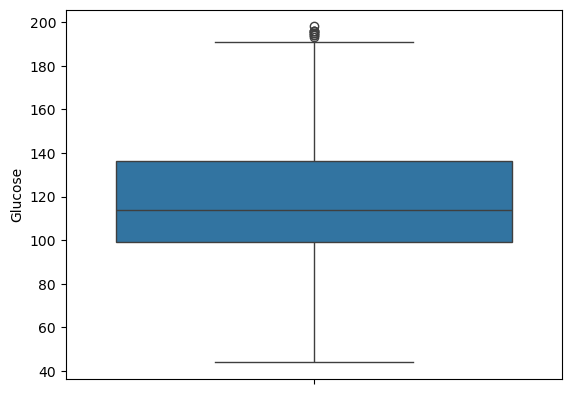

In [74]:
sns.boxplot(df['Glucose'])

In [91]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    29.780362
1    36.078431
Name: Age, dtype: float64

<Axes: >

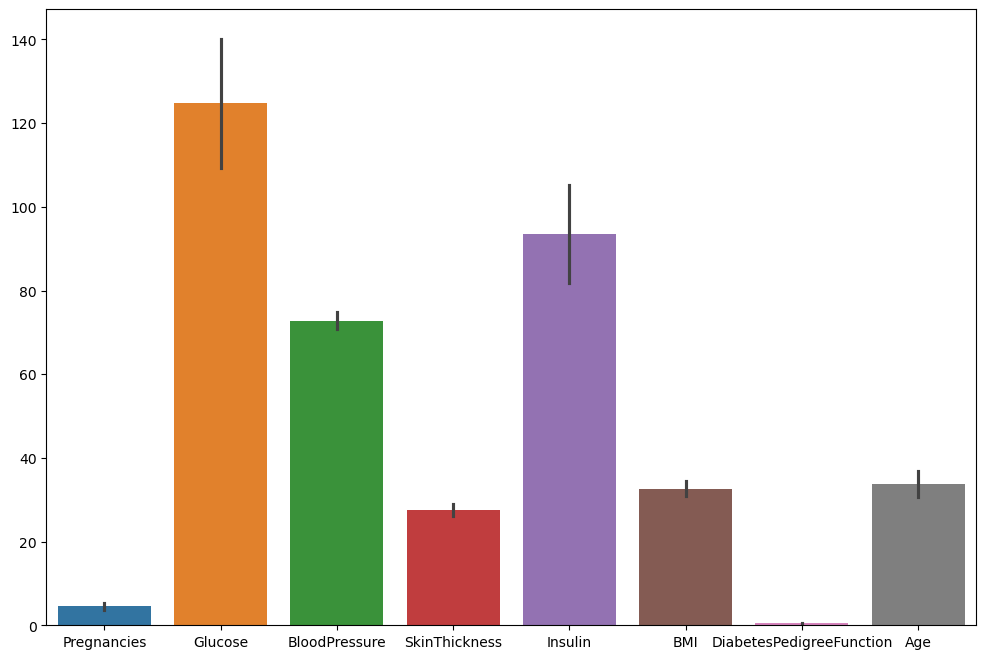

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(df.groupby("Outcome").mean())
# sns.barplot(df.groupby("Outcome")["Glucose"].mean())


<Axes: xlabel='Outcome', ylabel='Age'>

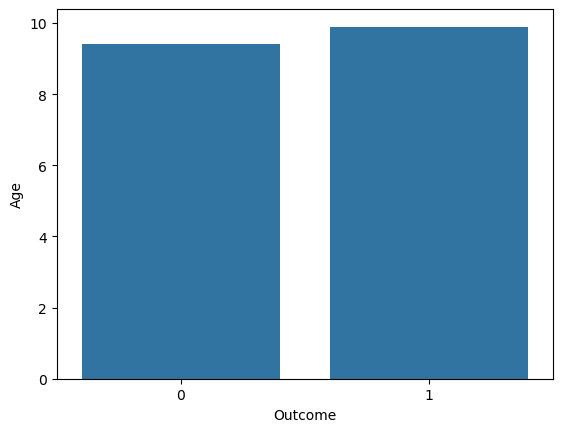

In [ ]:
sns.barplot(df.groupby('Outcome')['Age'].std())

<Axes: xlabel='Age'>

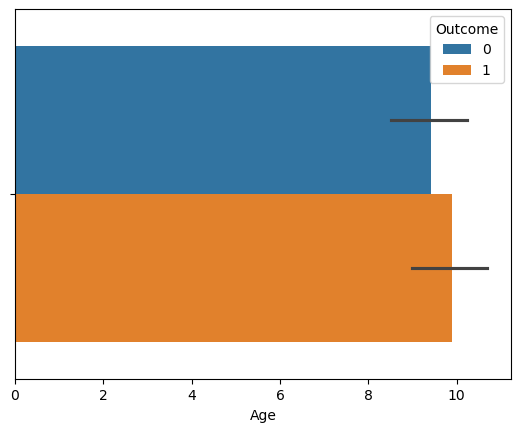

In [97]:
sns.barplot(x=df['Age'],hue=df['Outcome'],estimator='std')

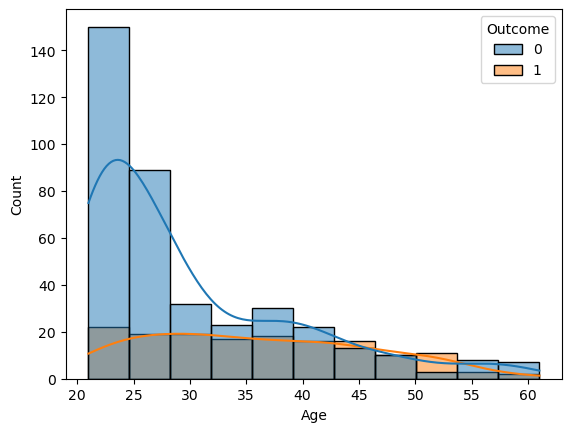

In [100]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [101]:
df['Outcome'].value_counts()

Outcome
0    387
1    153
Name: count, dtype: int64

<Axes: xlabel='BMI'>

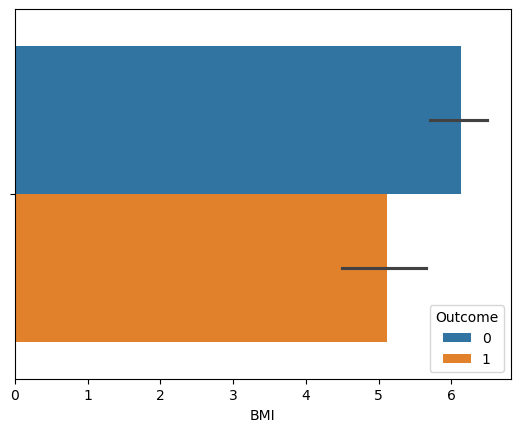

In [104]:
df['BMI'].groupby(df['Outcome']).mean()
sns.barplot(x='BMI',hue='Outcome',data=df,estimator='std')

<Axes: xlabel='BMI', ylabel='Count'>

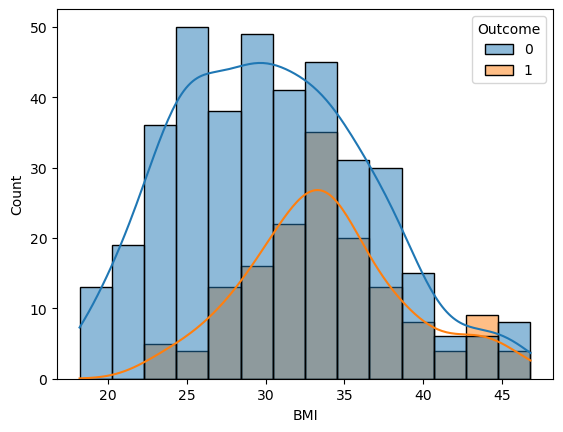

In [110]:
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)


Range for Pregnancies: -4.0to 12.0  16.0
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     42.5  33.6   
1              1       85             66             29     42.5  26.6   
2              8      183             64             23     42.5  23.3   
3              1       89             66             23     94.0  28.1   
5              5      116             74             23     42.5  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     42.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     42.5  30.1   
767            1       93             70             31     42.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       

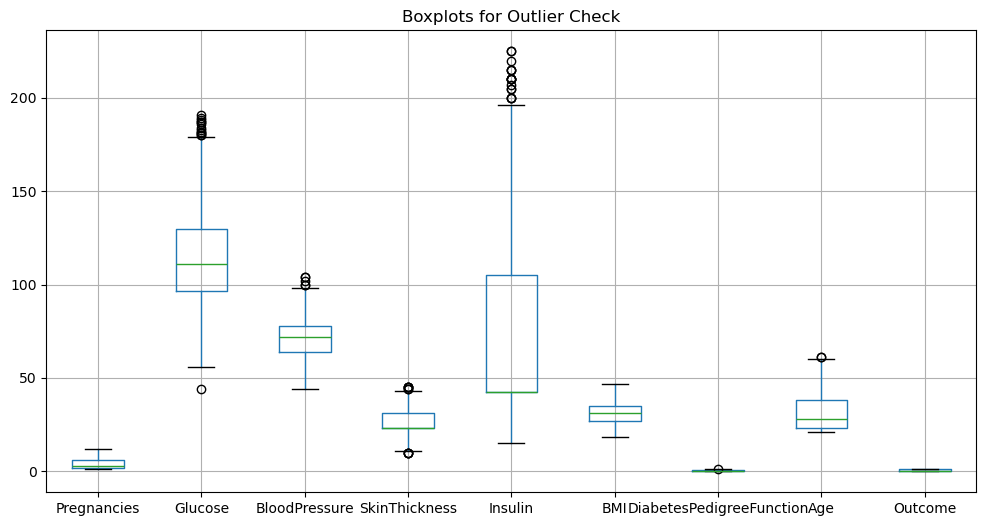

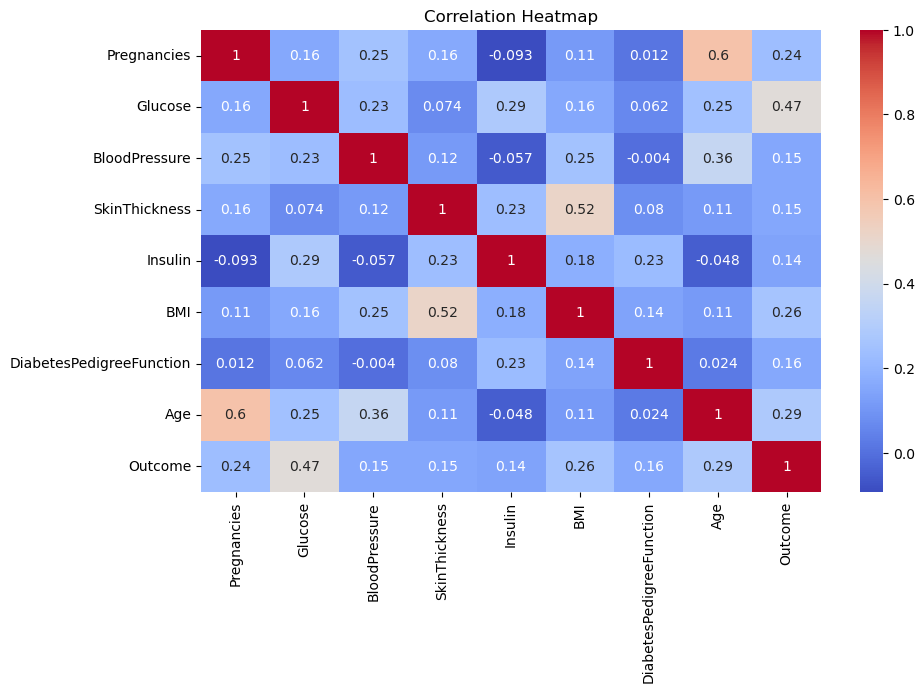

In [81]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"Range for {col}: {lower}to {upper} ",upper-lower)

    df = df[(df[col] >= lower) & (df[col] <= upper)]
    print(df)




# --------------------------------------------
# 6️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# --------------------------------------------
# Boxplots
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Boxplots for Outlier Check")
plt.show()


# --------------------------------------------
# 7️⃣ CORRELATION ANALYSIS
# --------------------------------------------
corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

